In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [82]:
df = pd.read_csv('AdultIncome.csv')
df.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19787 entries, 0 to 19786
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19787 non-null  int64 
 1   wc              19787 non-null  object
 2   education       19787 non-null  object
 3   marital status  19787 non-null  object
 4   race            19787 non-null  object
 5   gender          19787 non-null  object
 6   hours per week  19787 non-null  int64 
 7   IncomeClass     19787 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


In [84]:
df.describe()

,age,hours per week
count,19787.000000,19787.000000
mean,37.467378,40.938596
std,12.543376,10.991015
min,17.000000,1.000000
25%,27.000000,40.000000
50%,36.000000,40.000000
75%,46.000000,45.000000
max,90.000000,99.000000


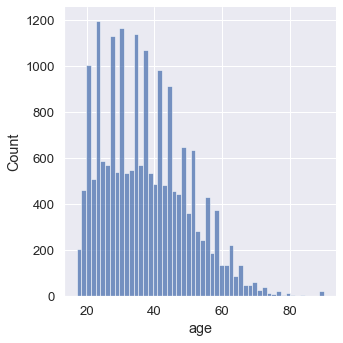

In [85]:
sns.displot(df['age'])

<AxesSubplot:xlabel='age'>

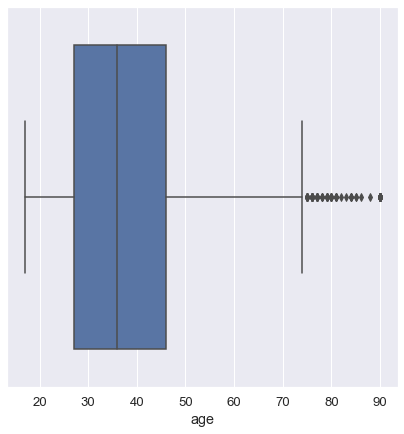

In [86]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='hours per week', ylabel='Density'>

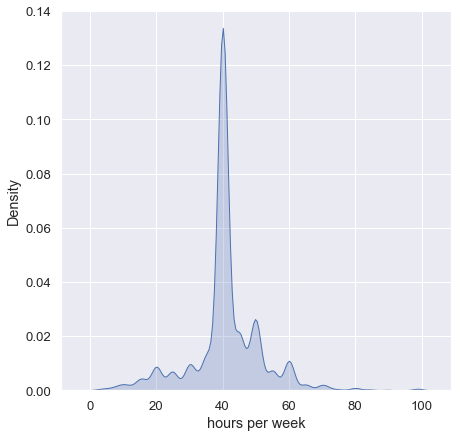

In [87]:
sns.kdeplot(df['hours per week'], shade=True)

<AxesSubplot:xlabel='hours per week'>

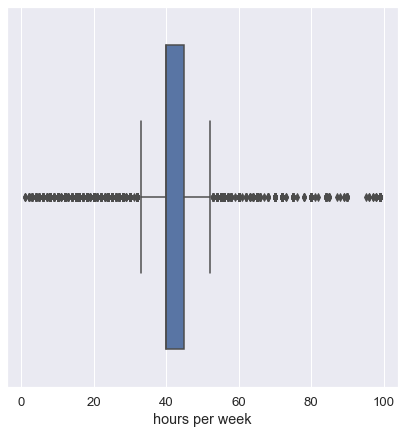

In [88]:
sns.boxplot(df['hours per week'])

wc 

 Private         17248
 Local-gov        1717
 Federal-gov       819
 Never-worked        3
Name: wc, dtype: int64 



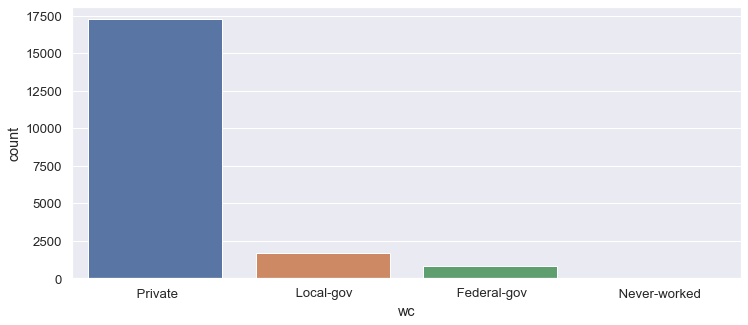

--------------------------------------------------
education 

 HS-grad         8207
 Some-college    5559
 Bachelors       4162
 Masters         1285
 Prof-school      309
 Doctorate        221
 Preschool         44
Name: education, dtype: int64 



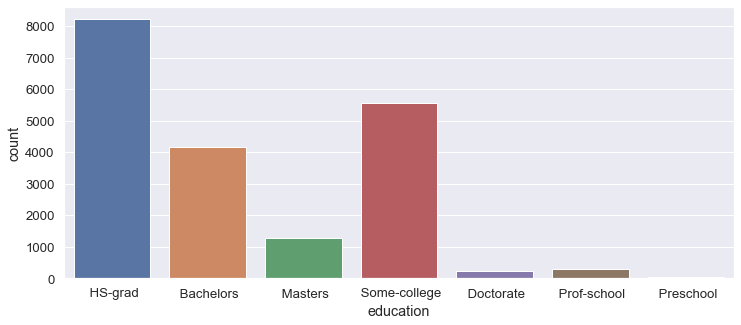

--------------------------------------------------
marital status 

Married           9285
 Never-married    7056
 Divorced         2917
 Widowed           529
Name: marital status, dtype: int64 



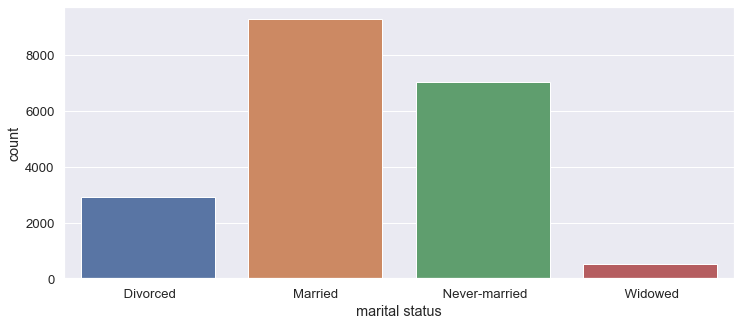

--------------------------------------------------
race 

 White                 16995
 Black                  1828
 Asian-Pac-Islander      650
 Amer-Indian-Eskimo      173
 Other                   141
Name: race, dtype: int64 



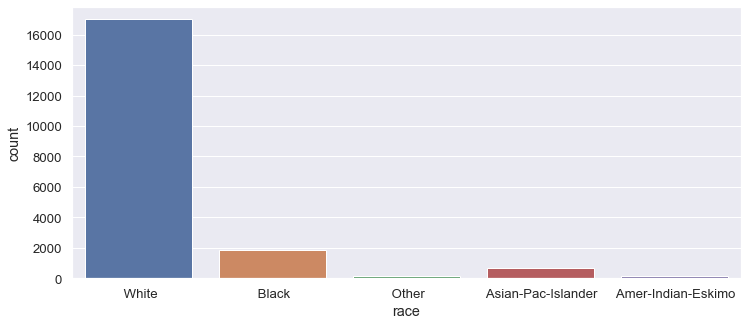

--------------------------------------------------
gender 

 Male      13100
 Female     6687
Name: gender, dtype: int64 



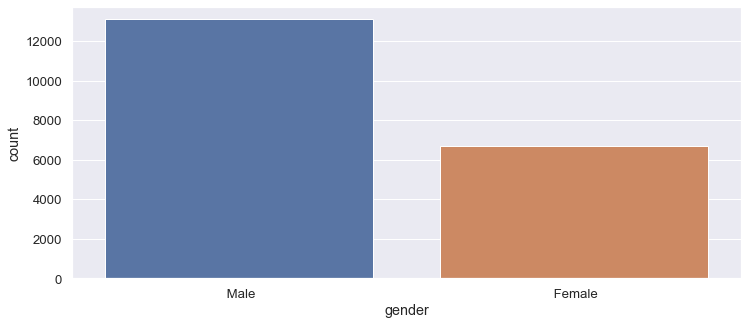

--------------------------------------------------
IncomeClass 

 <=50K    14575
 >50K      5212
Name: IncomeClass, dtype: int64 



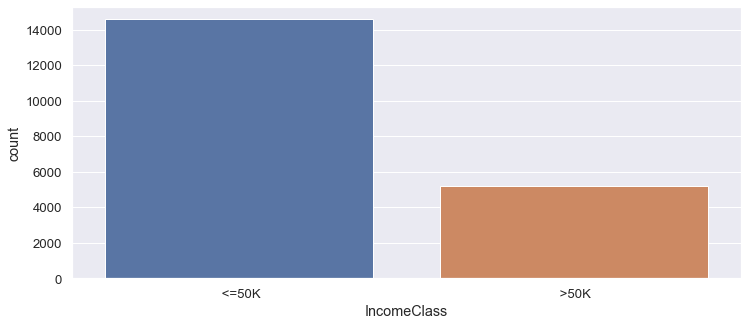

--------------------------------------------------


In [89]:
for col in df[['wc', 'education', 'marital status', 'race', 'gender', 'IncomeClass']]:
    print(col, '\n')
    print(df[col].value_counts(),'\n')
    plt.figure(figsize=(12,5))
    sns.countplot(df[col])
    plt.show()
    print(50*('-'))

In [90]:
cat_cols = df[['wc', 'education', 'marital status', 'race', 'gender']]

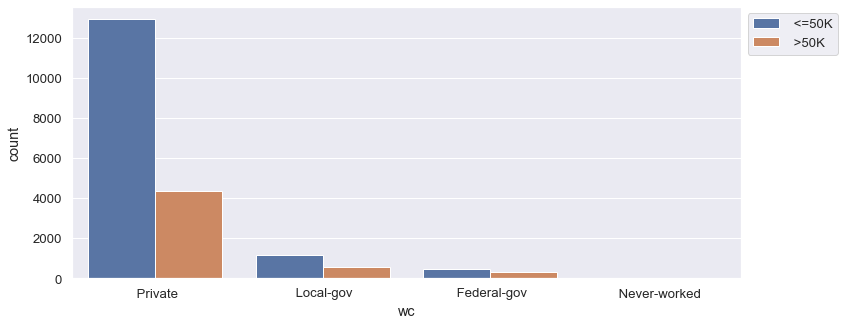

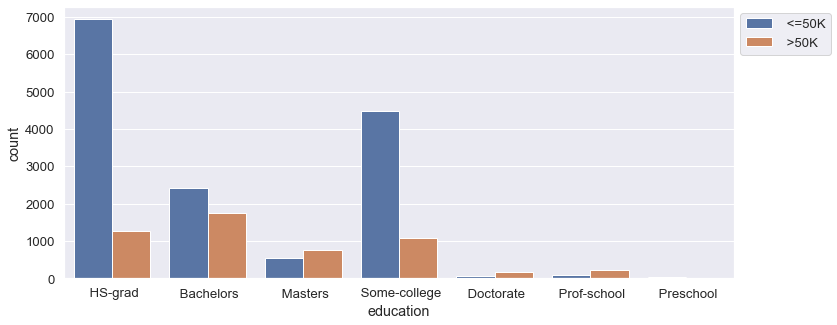

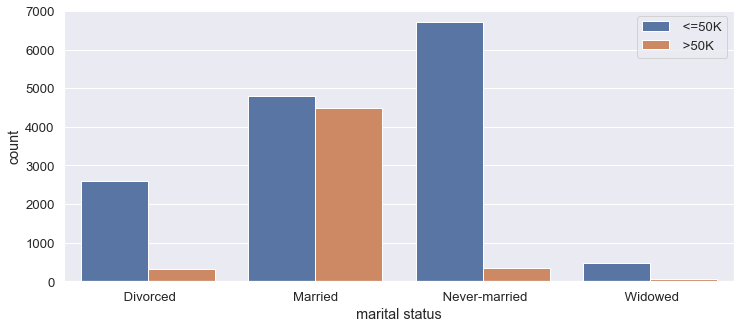

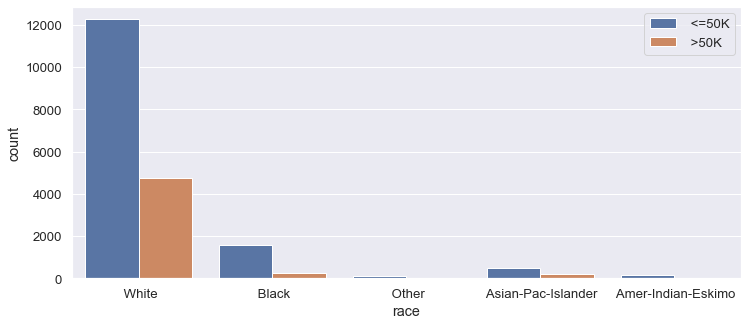

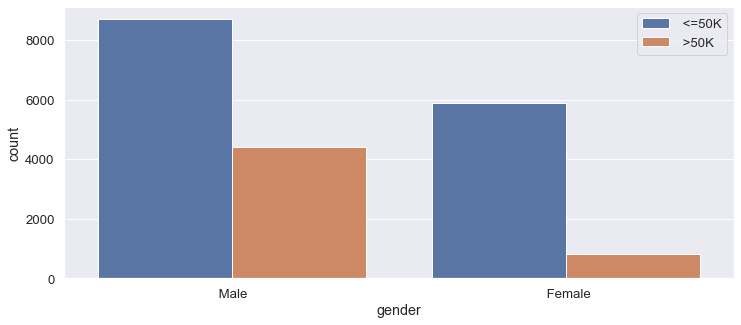

In [91]:
for col in cat_cols:
    if col !='IncomeClass':
        plt.figure(figsize=(12,5))
        sns.countplot(df[col], hue=df['IncomeClass'])
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
            

<AxesSubplot:xlabel='age', ylabel='hours per week'>

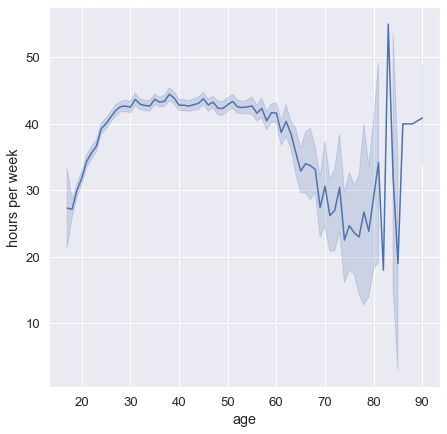

In [92]:
sns.lineplot(data=df, x='age', y='hours per week')

In [93]:
df.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [100]:
le = LabelEncoder()
for col in df[['IncomeClass', 'gender']]:
    df[col] = le.fit_transform(df[col])

In [101]:
df = pd.get_dummies(df)

In [105]:
df

,age,gender,hours per week,IncomeClass,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,education_ Bachelors,education_ Doctorate,...,education_ Some-college,marital status_ Divorced,marital status_ Never-married,marital status_ Widowed,marital status_Married,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,38,1,40,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,28,0,40,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
2,37,0,40,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,31,0,50,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,42,1,40,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19782,53,1,40,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
19783,22,1,40,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
19784,40,1,40,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
19785,58,0,40,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [106]:
x = df.drop('IncomeClass', axis=1)
y = df['IncomeClass']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [108]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [109]:
models = {
    "LOR": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    'Naive': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier(),
    'SVM': SVC()
}

In [144]:
for name, model in models.items():
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')  
    print('-'*30)

Using model: LOR
Training Score: 0.8160970370838335
Test Score: 0.8084891359272359
------------------------------
Using model: KNN
Training Score: 0.8480636805862657
Test Score: 0.794087923193532
------------------------------
Using model: Naive
Training Score: 0.30204055846863354
Test Score: 0.314300151591713
------------------------------
Using model: DT
Training Score: 0.9065007265146251
Test Score: 0.7809499747347145
------------------------------
Using model: RF
Training Score: 0.9064375513298376
Test Score: 0.8029307731177362
------------------------------
Using model: XGB
Training Score: 0.8552656516520311
Test Score: 0.8206164729661445
------------------------------
Using model: SVM
Training Score: 0.8188135700296924
Test Score: 0.8158160687215765
------------------------------
